In [53]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, classification_report

df=pd.read_csv('C:/Users/asnav/Desktop/MachineLearning/datasets/loan_approval_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [56]:
df.shape

(614, 13)

In [57]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [58]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [59]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [61]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [62]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     50
3       1
Name: count, dtype: int64

In [63]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [64]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [65]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [66]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [67]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [68]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [69]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [70]:
df['Dependents'].unique()

array(['0', '1', '2', '3', '3+', nan], dtype=object)

In [71]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [72]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [73]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [74]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [75]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [76]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [77]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [78]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [79]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [80]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [82]:
df['Married']=label.fit_transform(df['Married'])
df['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [83]:
df['Dependents']=label.fit_transform(df['Dependents'])
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [84]:
df['Education']=label.fit_transform(df['Education'])
df['Education']

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int64

In [85]:
df['Self_Employed']=label.fit_transform(df['Self_Employed'])
df['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

In [86]:
df['Property_Area']=label.fit_transform(df['Property_Area'])
df['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64

In [87]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,4,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [88]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,1,1,4,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [89]:
x=df.iloc[:,:-1].values
x

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]], shape=(614, 11))

In [90]:
y=df.iloc[:,-1:].values
y

array([['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
      

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[  1.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 180.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   4., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       [  0.,   1.,   0., ..., 360.,   1.,   1.]], shape=(429, 11))

In [92]:
x_test

array([[  1.,   0.,   0., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  0.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   0.],
       [  1.,   0.,   0., ..., 360.,   1.,   1.]], shape=(185, 11))

In [93]:
y_train

array([['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
      

In [94]:
y_test

array([['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
      

In [95]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.44908871, -1.4918324 , -0.71984059, ...,  0.28688828,
         0.42640143, -1.32720844],
       [ 0.44908871,  0.67031659, -0.71984059, ..., -2.64347058,
         0.42640143, -1.32720844],
       [ 0.44908871,  0.67031659, -0.71984059, ...,  0.28688828,
         0.42640143, -0.06193639],
       ...,
       [ 0.44908871,  0.67031659,  2.53938487, ...,  0.28688828,
         0.42640143, -0.06193639],
       [ 0.44908871,  0.67031659, -0.71984059, ...,  0.28688828,
         0.42640143,  1.20333566],
       [-2.22673154,  0.67031659, -0.71984059, ...,  0.28688828,
         0.42640143, -0.06193639]], shape=(429, 11))

In [96]:
x_test

array([[ 0.44908871, -1.4918324 , -0.71984059, ...,  0.28688828,
         0.42640143, -0.06193639],
       [-2.22673154, -1.4918324 , -0.71984059, ...,  0.28688828,
         0.42640143, -0.06193639],
       [ 0.44908871,  0.67031659, -0.71984059, ...,  0.28688828,
         0.42640143,  1.20333566],
       ...,
       [-2.22673154,  0.67031659, -0.71984059, ...,  0.28688828,
         0.42640143, -0.06193639],
       [ 0.44908871,  0.67031659, -0.71984059, ...,  0.28688828,
         0.42640143, -1.32720844],
       [ 0.44908871, -1.4918324 , -0.71984059, ...,  0.28688828,
         0.42640143, -0.06193639]], shape=(185, 11))

In [97]:
model=BernoulliNB()
model.fit(x_train,y_train)

c:\Users\asnav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [98]:
y_pred=model.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [99]:
y_test

array([['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
      

In [100]:
#print(model.predict(scaler.transform([[37, 15,  6,  2]])))

In [101]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 21,  30],
       [  2, 132]])

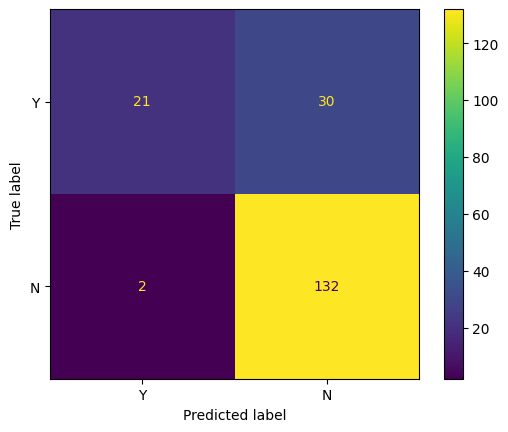

In [102]:
labels=['Y', 'N']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [103]:
score=accuracy_score(y_test,y_pred)
score

0.827027027027027

In [104]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

